# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импорт необходимых библиотек.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Вывод таблиц на экран для ознакомления. 

### 1 регион

In [2]:
try:  
    data_0 = pd.read_csv('C:/geo_data_0.csv')
except OSError as e:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
display(data_0.head(10))
display(data_0.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

### 2 регион

In [3]:
try:  
    data_1 = pd.read_csv('C:/geo_data_1.csv')
except OSError as e:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
display(data_1.head(10))
display(data_1.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

### 3 регион

In [4]:
try:  
    data_2 = pd.read_csv('C:/geo_data_2.csv')
except OSError as e:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
display(data_2.head(10))
display(data_2.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Проверка данных на наличие уникальных и некорректных значений.

In [5]:
def uniq_data(data):
    for column in data.columns:
        display('Значения столбца', column)
        display(data[column].sort_values().unique())

**1 регион**

In [6]:
uniq_data(data_0)

'Значения столбца'

'id'

array(['006OJ', '009eY', '00AfQ', ..., 'zztWK', 'zzyhQ', 'zzzLH'],
      dtype=object)

'Значения столбца'

'f0'

array([-1.40860531, -1.35177299, -1.30222711, ...,  2.33375269,
        2.33707957,  2.36233081])

'Значения столбца'

'f1'

array([-0.8482185 , -0.84490792, -0.8205609 , ...,  1.33334561,
        1.33482762,  1.34376933])

'Значения столбца'

'f2'

array([-12.08832812, -10.13834135, -10.13817115, ...,  15.23032159,
        15.42837187,  16.00379001])

'Значения столбца'

'product'

array([0.00000000e+00, 4.02152316e-03, 6.11363631e-03, ...,
       1.85355615e+02, 1.85362690e+02, 1.85364347e+02])

Столбец product имеет значение 0. Проверим сколько таких.

In [7]:
data_0[data_0['product'] == 0]['product'].count()

1

**2 регион**

In [8]:
uniq_data(data_1)

'Значения столбца'

'id'

array(['0022J', '003Gl', '003Vx', ..., 'zzv4E', 'zzy2c', 'zzzvI'],
      dtype=object)

'Значения столбца'

'f0'

array([-31.60957602, -27.82961614, -26.64625507, ...,  28.93082879,
        29.25906208,  29.42175461])

'Значения столбца'

'f1'

array([-26.35859801, -25.38962242, -25.2915177 , ...,  16.0268693 ,
        16.7371962 ,  18.73406263])

'Значения столбца'

'f2'

array([-0.01814409, -0.01788668, -0.01768626, ...,  5.01750345,
        5.01909142,  5.01972056])

'Значения столбца'

'product'

array([  0.        ,   3.17910258,  26.95326103,  30.13236361,
        53.90652206,  57.08562465,  80.85978309,  84.03888568,
       107.81304413, 110.99214671, 134.76630516, 137.94540774])

Столбец product имеет значение 0. Проверим сколько таких.

In [9]:
data_1[data_1['product'] == 0]['product'].count()

8235

**3 регион**

In [10]:
uniq_data(data_2)

'Значения столбца'

'id'

array(['009Gl', '00AuD', '00CaL', ..., 'zzqqy', 'zzsKd', 'zzz9h'],
      dtype=object)

'Значения столбца'

'f0'

array([-8.76000362, -7.45058711, -7.18949804, ...,  7.19461485,
        7.21552717,  7.23826248])

'Значения столбца'

'f1'

array([-7.08401976, -6.74835677, -6.73299712, ...,  7.10161842,
        7.76185714,  7.84480127])

'Значения столбца'

'f2'

array([-11.97033454, -11.61169048, -11.40724351, ...,  16.31301122,
        16.35764509,  16.73940206])

'Значения столбца'

'product'

array([0.00000000e+00, 4.60600004e-03, 9.20411196e-03, ...,
       1.90011722e+02, 1.90013589e+02, 1.90029838e+02])

Столбец product имеет значение 0. Проверим сколько таких.

In [11]:
data_2[data_2['product'] == 0]['product'].count()

1

Так как значения столбца id не важны для исследования, удалим его.

In [12]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

Проверка на анличие и удаление дубликатов.

In [13]:
data_0 = data_0.drop_duplicates()
data_1 = data_1.drop_duplicates()
data_2 = data_2.drop_duplicates()
data_0.info()
data_1.info()
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

Для визуализации кол-ва продукта в скважинах посмтроим гистограмму.

In [14]:
def hist(data):
    plt.figure(figsize=[15,10])

    plt.hist(data, bins=200)

    plt.xlim([0,180])
    plt.ylim([0,850])

    plt.xlabel("Объём запасов продукта в скважине, тыс. барелей")
    plt.ylabel("Количество скважин, шт")

    plt.title("Гистограмма распределения продукта в скважинах")
    plt.show()

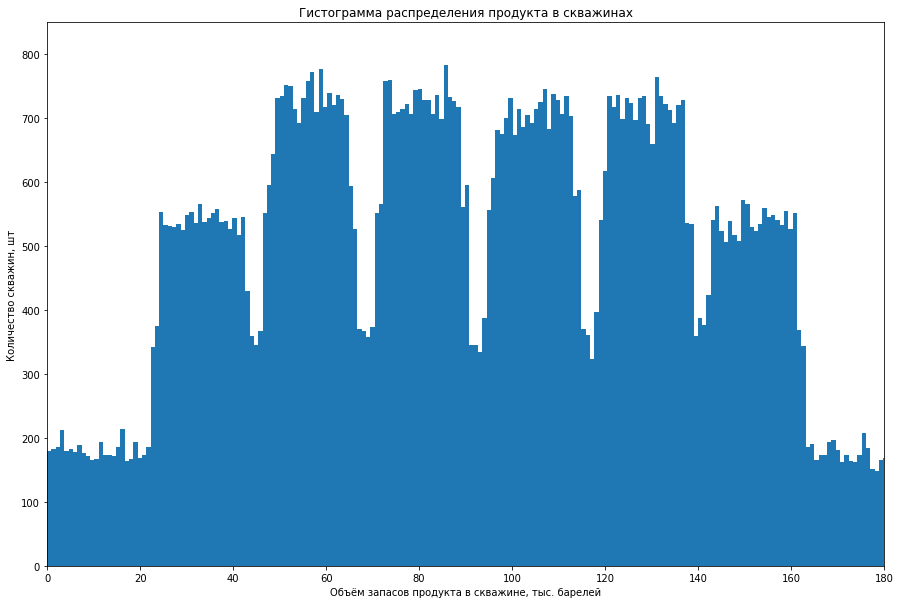

In [15]:
hist(data_0['product'])

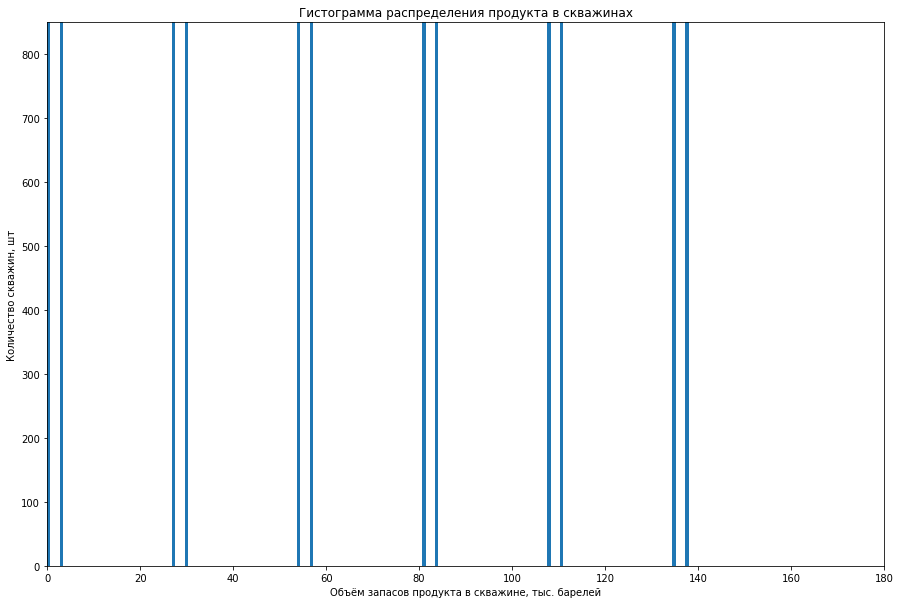

In [16]:
hist(data_1['product'])

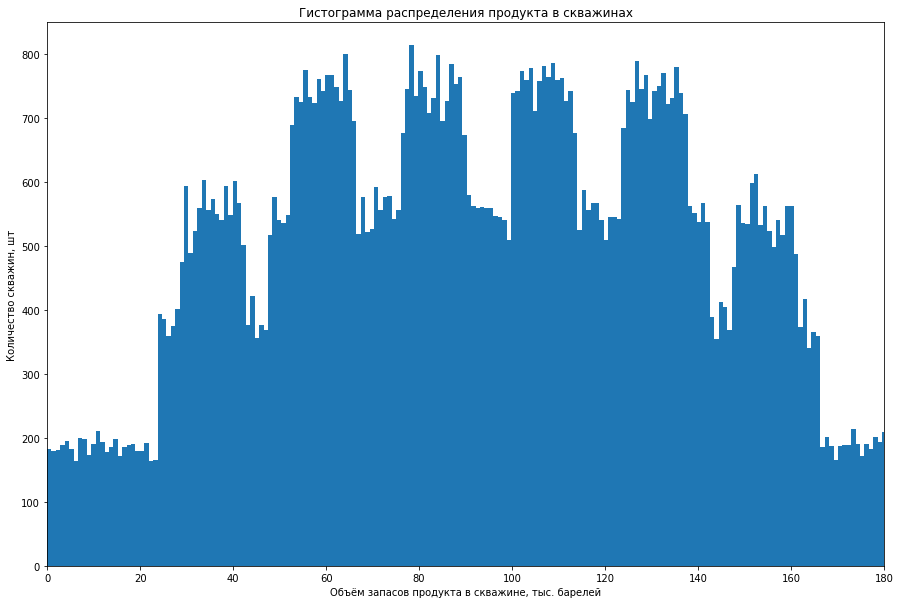

In [17]:
hist(data_2['product'])

### Вывод

Данные изучены и подготовленны к исследованию.
<br>
В столбце `product` имеются нули, скорее всего это говорит о об отсутствии продукта в конкретной скважине.
<br>
Гистограмма данных data_1 говорит о том, что вероятно данные подогнаны искуственно, т.к. в самой таблице имеются повторяющиеся значения и на гистограмме видны вспелски через одинаковые промежутки.
<br>
Что касается гистограмм data_0 и data_2 они имеют распределение билзкое к нормальному.



## Обучение и проверка модели

###  Модель для первого региона

Создание обучающей и валидационной выборки в соотношении 75:25.

In [18]:
target_data_0 = data_0['product']
features_data_0 = data_0.drop('product', axis=1)

features_train_data_0, features_valid_data_0, target_train_data_0, target_valid_data_0 = train_test_split(
    features_data_0, target_data_0, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_0.shape[0])
print('Размер валидационной выборки', features_valid_data_0.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучение StandardScaler() на обучающей выборке.

In [19]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_0[numeric])
features_train_data_0[numeric] = scaler.transform(features_train_data_0[numeric])
features_valid_data_0[numeric] = scaler.transform(features_valid_data_0[numeric])

display(features_train_data_0.head())

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


Рассчет RMSE модели.

In [20]:
model = LinearRegression()
model.fit(features_train_data_0, target_train_data_0)
predictions_0 = model.predict(features_valid_data_0)
RMSE_0 = mean_squared_error(target_valid_data_0, predictions_0) **0.5  
print(RMSE_0)

37.5794217150813


Сохраним предсказания и правильные ответы на валидационной выборке.

Вывод на экран среднего запаса предсказанного сырья и RMSE модели.

In [21]:
data_0_product = {'real_product' : target_valid_data_0,
                 'predicted_product' : predictions_0}

product_0 = pd.DataFrame(data_0_product, columns = ['real_product', 'predicted_product'])

print(product_0.head())
print('RMSE -', RMSE_0)
print('Среднее колмчество сырья по данным -', product_0['real_product'].mean())
print('Среднее количество сырья по модели -', product_0['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_0['real_product'].sum())
print('Суммарное количество сырья по модели -', product_0['predicted_product'].sum())

       real_product  predicted_product
71751     10.038645          95.894952
80493    114.551489          77.572583
2655     132.603635          77.892640
53233    169.072125          90.175134
91141    122.325180          70.510088
RMSE - 37.5794217150813
Среднее колмчество сырья по данным - 92.07859674082927
Среднее количество сырья по модели - 92.59256778438035
Суммарное количество сырья по данным - 2301964.918520732
Суммарное количество сырья по модели - 2314814.194609509


Предсказанные данные значения близки к реальным.

### Модель для второго региона

Создание обучающей и валидационной выборки в соотношении 75:25.

In [22]:
target_data_1 = data_1['product']
features_data_1 = data_1.drop('product', axis=1)

features_train_data_1, features_valid_data_1, target_train_data_1, target_valid_data_1 = train_test_split(
    features_data_1, target_data_1, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_1.shape[0])
print('Размер валидационной выборки', features_valid_data_1.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучение StandardScaler() на обучающей выборке.

In [23]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_1[numeric])
features_train_data_1[numeric] = scaler.transform(features_train_data_1[numeric])
features_valid_data_1[numeric] = scaler.transform(features_valid_data_1[numeric])

display(features_train_data_1.head())

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


Рассчет RMSE модели.

In [25]:
model = LinearRegression()
model.fit(features_train_data_1, target_train_data_1)
predictions_1 = model.predict(features_valid_data_1)
RMSE_1 = mean_squared_error(target_valid_data_1, predictions_1) **0.5  
print(RMSE_1)

0.893099286775617


Сохраним предсказания и правильные ответы на валидационной выборке.

Вывод на экран среднего запаса предсказанного сырья и RMSE модели.

In [27]:
data_1_product = {'real_product' : target_valid_data_1,
                 'predicted_product' : predictions_1}

product_1 = pd.DataFrame(data_1_product, columns = ['real_product', 'predicted_product'])

print(product_1.head())
print('RMSE -', RMSE_1)
print('Среднее колмчество сырья по данным -', product_1['real_product'].mean())
print('Среднее количество сырья по модели -', product_1['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_1['real_product'].sum())
print('Суммарное количество сырья по модели -', product_1['predicted_product'].sum())

       real_product  predicted_product
71751     80.859783          82.663314
80493     53.906522          54.431786
2655      30.132364          29.748760
53233     53.906522          53.552133
91141      0.000000           1.243856
RMSE - 0.893099286775617
Среднее колмчество сырья по данным - 68.72313602435997
Среднее количество сырья по модели - 68.728546895446
Суммарное количество сырья по данным - 1718078.4006089992
Суммарное количество сырья по модели - 1718213.67238615


Предсказанные данные значения близки к реальным.

### Модель для третьего региона

Создание обучающей и валидационной выборки в соотношении 75:25.

In [29]:
target_data_2 = data_2['product']
features_data_2 = data_2.drop('product', axis=1)

features_train_data_2, features_valid_data_2, target_train_data_2, target_valid_data_2 = train_test_split(
    features_data_2, target_data_2, test_size=0.25, random_state=12345)

print('Размер обучающей выборки', features_train_data_2.shape[0])
print('Размер валидационной выборки', features_valid_data_2.shape[0])

Размер обучающей выборки 75000
Размер валидационной выборки 25000


Обучение StandardScaler() на обучающей выборке.

In [30]:
numeric = ['f0', 'f1', 'f2']

scaler = StandardScaler()
scaler.fit(features_train_data_2[numeric])
features_train_data_2[numeric] = scaler.transform(features_train_data_2[numeric])
features_valid_data_2[numeric] = scaler.transform(features_valid_data_2[numeric])

display(features_train_data_2.head())

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


Рассчет RMSE модели.

In [31]:
model = LinearRegression()
model.fit(features_train_data_2, target_train_data_2)
predictions_2 = model.predict(features_valid_data_2)
RMSE_2 = mean_squared_error(target_valid_data_2, predictions_2) **0.5  
print(RMSE_2)

40.02970873393434


Сохраним предсказания и правильные ответы на валидационной выборке.

Вывод на экран среднего запаса предсказанного сырья и RMSE модели.

In [33]:
data_2_product = {'real_product' : target_valid_data_2,
                  'predicted_product' : predictions_2}

product_2 = pd.DataFrame(data_2_product, columns = ['real_product', 'predicted_product'])

print(product_2.head())
print('RMSE -', RMSE_2)
print('Среднее колмчество сырья по данным -', product_2['real_product'].mean())
print('Среднее количество сырья по модели -', product_2['predicted_product'].mean())
print('Суммарное количество сырья по данным -', product_2['real_product'].sum())
print('Суммарное количество сырья по модели -', product_2['predicted_product'].sum())

       real_product  predicted_product
71751     61.212375          93.599633
80493     41.850118          75.105159
2655      57.776581          90.066809
53233    100.053761         105.162375
91141    109.897122         115.303310
RMSE - 40.02970873393434
Среднее колмчество сырья по данным - 94.88423280885438
Среднее количество сырья по модели - 94.96504596800489
Суммарное количество сырья по данным - 2372105.8202213594
Суммарное количество сырья по модели - 2374126.1492001223


Предсказанные данные значения близки к реальным.

### Вывод

Модели для трех различных регионов предсказали очень близкие к реальным значения:
<br>

Для первого региона:

- Среднее колмчество сырья по данным - 92.07859674082927
- Среднее количество сырья по модели - 92.59256778438035
- Суммарное количество сырья по данным - 2301964.918520732
- Суммарное количество сырья по модели - 2314814.194609509
<br>

Для второго региона:

- Среднее колмчество сырья по данным - 68.72313602435997
- Среднее количество сырья по модели - 68.728546895446
- Суммарное количество сырья по данным - 1718078.4006089992
- Суммарное количество сырья по модели - 1718213.67238615
<br>

Для третьего региона:

- Среднее колмчество сырья по данным - 94.88423280885438
- Среднее количество сырья по модели - 94.96504596800489
- Суммарное количество сырья по данным - 2372105.8202213594
- Суммарное количество сырья по модели - 2374126.1492001223

## Подготовка к расчёту прибыли

Сохранение в отдельные переменные ключевых значений для расчётов.

In [35]:
budget = 1e+07
all_area = 500
best_area = 200
price_per_barrel = 450

Рассчет безубыточной разработки сырья на 200 скважинах и поиск необходимого для этого среднего кол-ва сырья в скважинах.

In [36]:
average_profit = budget / best_area
print('Средняя прибыль на лучшем месторождении -', average_profit, 'тыс.руб.')

average_barrels = average_profit  / price_per_barrel
print('Средний объем нефти на лучшем месторождении -',average_barrels, 'тыс. барелей')

average_barrels = budget / price_per_barrel
print('Средний объем нефти на регион -',average_barrels, 'тыс. барелей')

Средняя прибыль на лучшем месторождении - 50000.0 тыс.руб.
Средний объем нефти на лучшем месторождении - 111.11111111111111 тыс. барелей
Средний объем нефти на регион - 22222.222222222223 тыс. барелей


Проверка какое в среднем количество сырья на скважинах по регионам.

In [37]:
print('Средний запас сырья на скважину в регионе 1', data_0['product'].mean(), 'тыс. барелей')
print('Средний запас сырья на скважину в регионе 2', data_1['product'].mean(), 'тыс. барелей')
print('Средний запас сырья на скважину в регионе 3', data_2['product'].mean(), 'тыс. барелей')

Средний запас сырья на скважину в регионе 1 92.50000000000001 тыс. барелей
Средний запас сырья на скважину в регионе 2 68.82500000000002 тыс. барелей
Средний запас сырья на скважину в регионе 3 95.00000000000004 тыс. барелей


Создание функции для расчета прибыли.

In [38]:
def profit_all(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

###  Вывод
<br>

Получены необходимые данные по безубыточной разработке сырья на 200 лучших скважинах из отобранных 500.

- Средняя прибыль на лучшем месторождении - 50000.0 тыс.руб.
- Средний объем нефти на лучшем месторождении - 111.11111111111111 тыс. барелей
- Средний объем нефти на регион - 22222.222222222223 тыс. барелей
<br>

В сочетании с со средними запасами сырья на скважину по каждому региону, думаю, что скважины в первом и третьем регионе будут окупаемы.


## Расчёт прибыли и рисков 

Применение техники Bootstrap с 1000 выборок, для того чтобы найти распределение прибыли.

In [40]:
state = np.random.RandomState(12345)
def bootstrap(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=all_area)
        probs_sample = probs[target_sample.index]
        profit = profit_all(target, probs_sample, best_area)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

Рассчёт прибыли и рисков по каждому региону.

In [41]:
average_0, lower_0, upper_0, risk_0 = bootstrap(product_0['real_product'], product_0['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Данные по первому региону.
Средняя прибыль по региону = 396164.98 тыс.руб.
95% доверительный интервал от -111215.55 до 909766.94 тыс.руб.
Процент риска 6.90%


In [42]:
average_1, lower_1, upper_1, risk_1 = bootstrap(product_1['real_product'], product_1['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Данные по второму региону.
Средняя прибыль по региону = 461155.82 тыс.руб.
95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
Процент риска 0.70%


In [43]:
average_2, lower_2, upper_2, risk_2 = bootstrap(product_2['real_product'], product_2['predicted_product'])
print('Данные по третьему региону.')
print('Средняя прибыль по региону = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Данные по третьему региону.
Средняя прибыль по региону = 392950.48 тыс.руб.
95% доверительный интервал от -112227.63 до 934562.91 тыс.руб.
Процент риска 6.50%


### Вывод
<br>
Значения средней прибыли и процент риска по регионам следующие:
<br>

Данные по первому региону.

- Средняя прибыль по региону = 396164.98 тыс.руб.
- 95% доверительный интервал от -111215.55 до 909766.94 тыс.руб.
- Процент риска 6.90%
<br>

Данные по второму региону.

- Средняя прибыль по региону = 461155.82 тыс.руб.
- 95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
- Процент риска 0.70%
<br>

Данные по третьему региону.

- Средняя прибыль по региону = 392950.48 тыс.руб.
- 95% доверительный интервал от -112227.63 до 934562.91 тыс.руб.
- Процент риска 6.50%

# Итоговый вывод

В ходе исследования были изучены данные по трем регионам. 
<br>
Построена модель, которая предсказывает кол-во сырья в скважинах.
<br>
Лучшим регионом для добычи будет являться второй регион.
<br>
Данные по третьему региону.

- Средняя прибыль по региону = 461155.82 тыс.руб.
- 95% доверительный интервал от 78050.81 до 862952.06 тыс.руб.
- Процент риска 0.70%

